In [3]:
import numpy as np
from astropy.table import Table, join
import h5py
import fitsio
import os, sys
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import sys
sys.path.insert(0, '/global/homes/s/severett/repos/balutils/')
from balutils import stacked_catalogs as sc

import seaborn as sb
plt.style.use('seaborn')
sb.set_context("notebook", font_scale=1.5)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
run_name = 'y3-merged'
ver='1.2'

print('det...')
det_file = '/project/projectdirs/des/severett/Balrog/{}/stacked_catalogs/{}/sof/balrog_detection_catalog_sof_{}_v{}.fits'.format(run_name, ver, run_name, ver)
det_cols = ['bal_id', 'meas_FLAGS_GOLD_SOF_ONLY', 'flags_footprint', 'flags_badregions', 'flags_foreground', 'match_flag_1.5_asec']
det = Table(fitsio.read(det_file, columns=det_cols))

print('sof...')
sof_file = '/project/projectdirs/des/severett/Balrog/{}/stacked_catalogs/{}/sof/balrog_matched_catalog_sof_{}_v{}.fits'.format(run_name, ver, run_name, ver)
# sof_cols = ['bal_id', 'meas_cm_flux_deredden', 'meas_cm_flux_err', 'meas_cm_T', 'meas_cm_fracdev', 'true_bdf_flux_deredden', 'true_bdf_T', 'true_bdf_fracdev']
sof_cols = ['bal_id', 'meas_cm_T', 'meas_cm_T_err', 'meas_cm_fracdev', 'meas_cm_fracdev_err', 'true_bdf_flux_deredden', 'true_bdf_T', 'true_bdf_fracdev']
sof = Table(fitsio.read(sof_file, columns=sof_cols))

print('joining...')
joined = join(det, sof, keys='bal_id')

det...
sof...
joining...


In [21]:
sample = joined[(joined['match_flag_1.5_asec'] < 2) &
                (joined['meas_FLAGS_GOLD_SOF_ONLY'] < 2) &
                (joined['flags_foreground'] == 0) &
                (joined['flags_footprint'] == 1) &
                (joined['flags_badregions'] < 2)
               ]

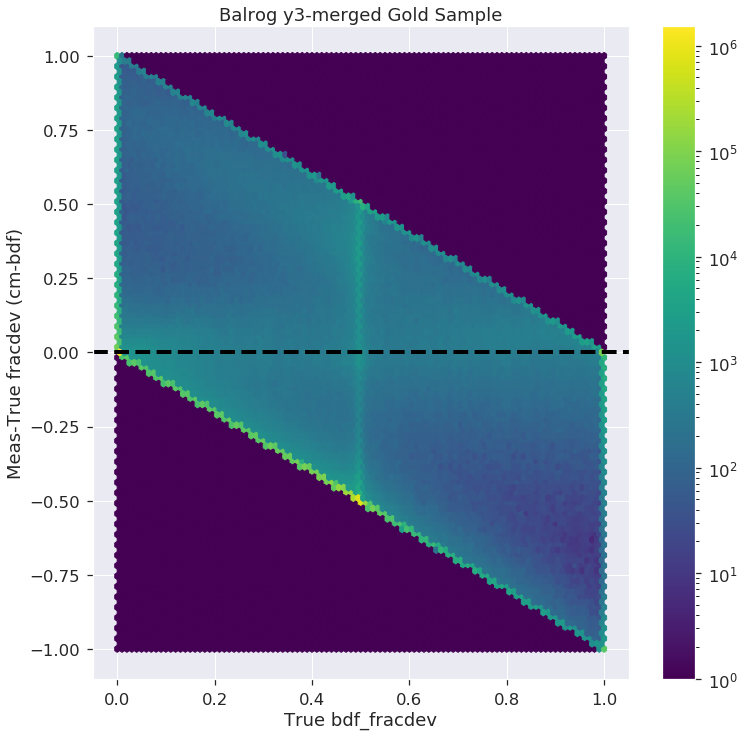

In [27]:
x = sample['true_bdf_fracdev']
y = sample['meas_cm_fracdev'] - x
hb = plt.hexbin(x, y, gridsize=100, cmap='viridis', norm=colors.LogNorm())
ax = plt.gca()
ax.axhline(0, ls='--', c='k', lw=4)
cb = plt.colorbar(hb, ax=ax)
# plt.scatter(x, y, alpha=0.2)
plt.xlabel('True bdf_fracdev')
plt.ylabel('Meas-True fracdev (cm-bdf)')
plt.title('Balrog y3-merged Gold Sample')
plt.gcf().set_size_inches(12, 12)

In [14]:
print(min(sample['meas_cm_fracdev']), max(sample['meas_cm_fracdev']))

-9999.0 1.0


In [15]:
print(min(sample['true_bdf_fracdev']), max(sample['true_bdf_fracdev']))

0.0 1.0


In [16]:
len(sample[sample['meas_cm_fracdev'] < 0])

33837

In [17]:
len(sample)

9570081

In [19]:
len(sample[sample['meas_cm_T'] == -9999])

33837

In [20]:
sample[sample['meas_cm_T'] == -9999]

bal_id,flags_footprint,flags_foreground,flags_badregions,meas_FLAGS_GOLD_SOF_ONLY,match_flag_1.5_asec,true_bdf_T,true_bdf_fracdev,true_bdf_flux_deredden [4],meas_cm_T,meas_cm_T_err,meas_cm_fracdev,meas_cm_fracdev_err
int64,float64,float64,float64,int32,int32,float64,float64,float32,float64,float64,float32,float32
100000037061,1.0,0.0,0.0,2,0,-0.011936114091946736,0.5001140497249768,22565.568 .. 550.6815,-9999.0,9999.0,-9999.0,-9999.0
100010042063,1.0,0.0,0.0,2,0,-0.011936114091946736,0.5001140497249768,22565.568 .. 550.6815,-9999.0,9999.0,-9999.0,-9999.0
100026051230,1.0,0.0,0.0,2,0,-0.011936114091946736,0.5001140497249768,22565.568 .. 550.6815,-9999.0,9999.0,-9999.0,-9999.0
100029026239,1.0,0.0,0.0,6,1,0.10139009996911859,0.4443052333454005,241.62334 .. 420.90842,-9999.0,9999.0,-9999.0,-9999.0
100042024150,1.0,0.0,0.0,6,0,-0.0032083981513498414,0.5028409811960356,715.5098 .. 11185.298,-9999.0,9999.0,-9999.0,-9999.0
100054047068,1.0,0.0,0.0,2,0,-0.0021718069265469707,0.5495423201103656,14278.795 .. 55150.438,-9999.0,9999.0,-9999.0,-9999.0
100058051230,1.0,0.0,0.0,2,0,-0.011936114091946736,0.5001140497249768,22565.568 .. 550.6815,-9999.0,9999.0,-9999.0,-9999.0
100122027492,1.0,0.0,0.0,2,0,-0.011936114091946736,0.5001140497249768,22565.568 .. 550.6815,-9999.0,9999.0,-9999.0,-9999.0
100123057481,1.0,0.0,0.0,2,0,-0.011936114091946736,0.5001140497249768,22565.568 .. 550.6815,-9999.0,9999.0,-9999.0,-9999.0
